In [ ]:
import pandas as pd
import numpy as np
import chess 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MultiLabelBinarizer
np.complex_ = np.complex128
np.float_ = np.float64
np.string_ = np.bytes_
np.unicode_ = np.str_
import matplotlib.pyplot as plt


#REMOVED SACRIFICE FROM CORE TACTICS
#ADDED ResNet-style CNN with residual blocks

In [2]:
df = pd.read_csv("lichess_db_puzzle.csv")

df.head(15)

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1942,75,95,7530,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1405,74,96,30875,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1257,78,90,688,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1080,74,87,586,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
4,000VW,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2844,104,85,246,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,NaN
5,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1575,80,75,102,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,NaN
6,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1353,75,86,627,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,NaN
7,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/...,g5e7 a5c3 b2c3 c6e7,1440,79,74,512,advantage master middlegame short,https://lichess.org/iihZGl6t#29,Benoni_Defense Benoni_Defense_Benoni-Indian_De...
8,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...,e8f7 e2e6 f7f8 e6f7,1483,76,91,566,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense Horwitz_Defense_Other_variations
9,000lC,3r3r/pQNk1ppp/1qnb1n2/1B6/8/8/PPP3PP/3R1R1K w ...,d1d6 d7d6 b7b6 a7b6,1408,76,94,3489,advantage hangingPiece middlegame short,https://lichess.org/vaqz2bx6#37,NaN


In [3]:
def parse_themes(theme_string):
    if isinstance(theme_string, str):
        return theme_string.split()
sample_theme = "crushing hangingPiece long middlegame"
tags = parse_themes(sample_theme)
print(tags) 

['crushing', 'hangingPiece', 'long', 'middlegame']


In [4]:
df['ParsedThemes'] = df['Themes'].apply(parse_themes)

df.head(14)

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags,ParsedThemes
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1942,75,95,7530,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN,"[crushing, hangingPiece, long, middlegame]"
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1405,74,96,30875,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN,"[advantage, endgame, short]"
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1257,78,90,688,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN,"[advantage, endgame, rookEndgame, short]"
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1080,74,87,586,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...,"[advantage, middlegame, short]"
4,000VW,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2844,104,85,246,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,NaN,"[crushing, endgame, long]"
5,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1575,80,75,102,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,NaN,"[crushing, endgame, long, pawnEndgame]"
6,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1353,75,86,627,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,NaN,"[endgame, mate, mateIn2, short]"
7,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/...,g5e7 a5c3 b2c3 c6e7,1440,79,74,512,advantage master middlegame short,https://lichess.org/iihZGl6t#29,Benoni_Defense Benoni_Defense_Benoni-Indian_De...,"[advantage, master, middlegame, short]"
8,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...,e8f7 e2e6 f7f8 e6f7,1483,76,91,566,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense Horwitz_Defense_Other_variations,"[mate, mateIn2, middlegame, short]"
9,000lC,3r3r/pQNk1ppp/1qnb1n2/1B6/8/8/PPP3PP/3R1R1K w ...,d1d6 d7d6 b7b6 a7b6,1408,76,94,3489,advantage hangingPiece middlegame short,https://lichess.org/vaqz2bx6#37,NaN,"[advantage, hangingPiece, middlegame, short]"


In [65]:
from collections import Counter
all_labels = [label for labels in df["ParsedThemes"] for label in labels]
label_counter = Counter(all_labels)

label_counter

Counter({'short': 2542764,
         'endgame': 2294763,
         'middlegame': 2243593,
         'crushing': 1935186,
         'advantage': 1444247,
         'mate': 1326242,
         'long': 1198539,
         'master': 665816,
         'fork': 654030,
         'oneMove': 625704,
         'mateIn2': 581354,
         'mateIn1': 578940,
         'kingsideAttack': 391533,
         'veryLong': 380967,
         'sacrifice': 342756,
         'pin': 296286,
         'defensiveMove': 287422,
         'advancedPawn': 277093,
         'opening': 257421,
         'discoveredAttack': 256331,
         'rookEndgame': 238060,
         'deflection': 203176,
         'hangingPiece': 197090,
         'quietMove': 191324,
         'attraction': 166049,
         'pawnEndgame': 154339,
         'backRankMate': 152242,
         'mateIn3': 141136,
         'exposedKing': 134930,
         'promotion': 106151,
         'skewer': 105612,
         'masterVsMaster': 68307,
         'queensideAttack': 67481,
     

In [66]:
import random
import ast

allowed_set = {"mate", "fork", "pin", "rookEndgame", "pawnEndgame", "hangingPiece", "discoveredAttack"}

def select_core_label(themes):
    """
    For a list of themes, convert any mate variants to 'mate',
    then keep only those in allowed_set.
    If multiple remain, choose one at random.
    Returns None if no allowed label is found.
    """
    selected = []
    for label in themes:
        # Merge any label containing 'mate' (case-insensitive) into "mate"
        if "mate" in label.lower():
            selected.append("mate")
        elif label in allowed_set:
            selected.append(label)
    # Remove duplicates
    selected = list(set(selected))
    return list(set(selected))

import ast
if df["ParsedThemes"].apply(lambda x: isinstance(x, str)).any():
    df["ParsedThemes"] = df["ParsedThemes"].apply(ast.literal_eval)

# Apply the function to create a new column "CoreLabel"
df["CoreLabel"] = df["ParsedThemes"].apply(select_core_label)

# Drop rows with no core label
core_tactics_df = df[df["CoreLabel"].apply(lambda x: len(x) > 0)].copy()
core_tactics_df.reset_index(drop=True, inplace=True)

# Check the result:
print(core_tactics_df[["ParsedThemes", "CoreLabel"]].head(10))
len(core_tactics_df)


                                   ParsedThemes       CoreLabel
0    [crushing, hangingPiece, long, middlegame]  [hangingPiece]
1      [advantage, endgame, rookEndgame, short]   [rookEndgame]
2        [crushing, endgame, long, pawnEndgame]   [pawnEndgame]
3               [endgame, mate, mateIn2, short]          [mate]
4            [mate, mateIn2, middlegame, short]          [mate]
5  [advantage, hangingPiece, middlegame, short]  [hangingPiece]
6      [crushing, endgame, fork, master, short]          [fork]
7           [advantage, fork, long, middlegame]          [fork]
8              [advantage, endgame, pin, short]           [pin]
9               [advantage, endgame, long, pin]           [pin]


2848026

In [7]:
core_tactics_df.head(10)

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags,ParsedThemes,CoreLabel
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1942,75,95,7530,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN,"[crushing, hangingPiece, long, middlegame]",[hangingPiece]
1,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1257,78,90,688,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN,"[advantage, endgame, rookEndgame, short]",[rookEndgame]
2,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1575,80,75,102,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,NaN,"[crushing, endgame, long, pawnEndgame]",[pawnEndgame]
3,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1353,75,86,627,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,NaN,"[endgame, mate, mateIn2, short]",[mate]
4,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...,e8f7 e2e6 f7f8 e6f7,1483,76,91,566,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense Horwitz_Defense_Other_variations,"[mate, mateIn2, middlegame, short]",[mate]
5,000lC,3r3r/pQNk1ppp/1qnb1n2/1B6/8/8/PPP3PP/3R1R1K w ...,d1d6 d7d6 b7b6 a7b6,1408,76,94,3489,advantage hangingPiece middlegame short,https://lichess.org/vaqz2bx6#37,NaN,"[advantage, hangingPiece, middlegame, short]",[hangingPiece]
6,000qP,8/7R/8/5p2/4bk1P/8/2r2K2/6R1 w - - 7 51,f2f1 f4f3 f1e1 c2c1 e1d2 c1g1,2094,75,92,852,crushing endgame exposedKing long skewer,https://lichess.org/r4xUR6fC#101,NaN,"[crushing, endgame, exposedKing, long, skewer]",[skewer]
7,000rO,3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58,a6a5 e5c7 a5b4 c7d8,1075,81,85,68,crushing endgame fork master short,https://lichess.org/tzeeBEc2#115,NaN,"[crushing, endgame, fork, master, short]",[fork]
8,0017R,r2qk2r/pp2ppbp/1n1p2p1/3Pn3/2P5/2NBBP1P/PP3P2/...,e5c4 d3c4 b6c4 d1a4 d8d7 a4c4,1688,75,96,1998,advantage fork long middlegame,https://lichess.org/ol84k0z4/black#24,Alekhine_Defense Alekhine_Defense_Other_variat...,"[advantage, fork, long, middlegame]",[fork]
9,0018S,2kr3r/pp3p2/4p2p/1N1p2p1/3Q4/1P1P4/2q2PPP/5RK1...,b7b6 d4a1 a7a5 f1c1,2630,113,91,1743,advantage endgame pin short,https://lichess.org/H1ARO2GL/black#40,NaN,"[advantage, endgame, pin, short]",[pin]


In [67]:
core_tactics_df
from tqdm import tqdm

sample = core_tactics_df.head(90000).copy()

# Extract first move from the Moves column
sample["FirstMove"] = sample["Moves"].str.split().str[0]

# Apply the first move to each FEN
updated_fens = []
for fen, move in tqdm(zip(sample["FEN"], sample["FirstMove"]), total=len(sample)):
    try:
        board = chess.Board(fen)
        board.push_uci(move)
        updated_fens.append(board.fen())
    except:
        updated_fens.append(None)

# Save result in sample DataFrame
sample["FEN_after_first_move"] = updated_fens

# Drop failed rows
sample = sample.dropna(subset=["FEN_after_first_move"]).reset_index(drop=True)

print(sample.head(20))
len(sample)


from collections import Counter
from itertools import chain

all_labels = list(chain.from_iterable(sample["CoreLabel"]))
label_counts = Counter(all_labels)

label_counts_df = pd.DataFrame(label_counts.items(), columns=["Label", "Count"]).sort_values(by="Count", ascending=False)
display(label_counts_df)

100%|██████████| 90000/90000 [00:24<00:00, 3663.84it/s]


   PuzzleId                                                FEN  \
0     00008  r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...   
1     0008Q       8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64   
2     000Vc             8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53   
3     000Zo  4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...   
4     000hf  r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...   
5     000lC  3r3r/pQNk1ppp/1qnb1n2/1B6/8/8/PPP3PP/3R1R1K w ...   
6     000rO          3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58   
7     0017R  r2qk2r/pp2ppbp/1n1p2p1/3Pn3/2P5/2NBBP1P/PP3P2/...   
8     0018S  2kr3r/pp3p2/4p2p/1N1p2p1/3Q4/1P1P4/2q2PPP/5RK1...   
9     001Hi  6k1/pp1r1pp1/1qp1p2p/4P2P/5Q2/1P4R1/P1Pr1PP1/R...   
10    001Wz  4r1k1/5ppp/r1p5/p1n1RP2/8/2P2N1P/2P3P1/3R2K1 b...   
11    001XA  1qr2rk1/pb2bppp/8/8/2p1N3/P1Bn2P1/2Q2PBP/1R3RK...   
12    001aK  6k1/5p2/4p3/P1B5/2P4P/4Pnp1/Rb1rN3/5K2 b - - 1 33   
13    001cr      8/3B2pp/p5k1/2p3P1/1p1p1K2/8/1P6/8 b - - 0 38   
14    001g

,Label,Count
3,mate,42087
4,fork,20664
5,pin,9286
6,discoveredAttack,8113
1,rookEndgame,7543
0,hangingPiece,6210
2,pawnEndgame,4760


In [72]:
import pandas as pd
from collections import defaultdict
import random

# Target per label
target_per_label = 7000

# Group samples by label
label_to_indices = defaultdict(list)
for idx, labels in enumerate(sample["CoreLabel"]):
    for label in labels:
        label_to_indices[label].append(idx)

# Sample indices per label
balanced_indices = set()
for label, indices in label_to_indices.items():
    if len(indices) >= target_per_label:
        selected = random.sample(indices, target_per_label)
    else:
        selected = random.choices(indices, k=target_per_label)  # oversample if needed
    balanced_indices.update(selected)

# Extract balanced DataFrame
sample_balanced = sample.loc[list(balanced_indices)].drop_duplicates(subset=["PuzzleId"]).reset_index(drop=True)


print("Balanced sample shape:", sample_balanced.shape)

sample_balanced.head(10)
from collections import Counter
from itertools import chain

all_labels = list(chain.from_iterable(sample_balanced["CoreLabel"]))
label_counts = Counter(all_labels)

label_counts_df = pd.DataFrame(label_counts.items(), columns=["Label", "Count"]).sort_values(by="Count", ascending=False)
display(label_counts_df)

Balanced sample shape: (41036, 14)


,Label,Count
4,mate,10765
5,fork,7883
2,pin,7232
3,discoveredAttack,7110
6,rookEndgame,7036
0,hangingPiece,4339
1,pawnEndgame,3692


In [85]:
from collections import Counter
from itertools import chain

all_labels = list(chain.from_iterable(sample_balanced["CoreLabel"]))
label_counts = Counter(all_labels)
for label, count in label_counts.items():
    print(label, count)
print(len(sample_balanced))


hangingPiece 4339
pawnEndgame 3692
pin 7232
discoveredAttack 7110
mate 10765
fork 7883
rookEndgame 7036
41036


In [86]:
piece_to_channel = {
    'P': 0, 'N': 1, 'B': 2, 'R': 3, 'Q': 4, 'K': 5,
    'p': 6, 'n': 7, 'b': 8, 'r': 9, 'q': 10, 'k': 11
}

In [87]:
def fen_to_board_array(fen):
    """
    Converts a FEN string into an 8x8x19 numpy array.
    Channels:
      0-11: Basic one-hot encoding for pieces.
      12: Attacked by White (1 if square is attacked by at least one white piece).
      13: Attacked by Black.
      14: White kingside castling rights (entire plane: 1 if available, else 0).
      15: White queenside castling rights.
      16: Black kingside castling rights.
      17: Black queenside castling rights.
      18: Side-to-move (entire plane: 1 if White, 0 if Black).
    """
    board = chess.Board(fen)
    board_array = np.zeros((8, 8, 19), dtype=np.float32)
    # --- 8x8x12 one-hot encoding for pieces ---
    for square, piece in board.piece_map().items():
        row = square // 8
        col = square % 8
        channel = piece_to_channel[piece.symbol()]
        board_array[row, col, channel] = 1.0
    # --- Attacked squares channels ---
    # Channel 12: attacked by white; Channel 13: attacked by black.
    for square in chess.SQUARES:
        row = square // 8
        col = square % 8
        if board.is_attacked_by(chess.WHITE, square):
            board_array[row, col, 12] = 1.0
        if board.is_attacked_by(chess.BLACK, square):
            board_array[row, col, 13] = 1.0

    # --- Castling rights channels ---
    # Channels 14-17: constant planes for castling rights.
    castling_channels = [14, 15, 16, 17]
    # White kingside
    flag = 1.0 if board.has_kingside_castling_rights(chess.WHITE) else 0.0
    board_array[:, :, 14] = flag
    # White queenside
    flag = 1.0 if board.has_queenside_castling_rights(chess.WHITE) else 0.0
    board_array[:, :, 15] = flag
    # Black kingside
    flag = 1.0 if board.has_kingside_castling_rights(chess.BLACK) else 0.0
    board_array[:, :, 16] = flag
    # Black queenside
    flag = 1.0 if board.has_queenside_castling_rights(chess.BLACK) else 0.0
    board_array[:, :, 17] = flag

    # --- Side-to-move channel ---
    # Channel 18: fill the plane with 1 if White's turn, else 0.
    side = 1.0 if board.turn == chess.WHITE else 0.0
    board_array[:, :, 18] = side

    return board_array

example_fen = sample_balanced["FEN_after_first_move"].iloc[0]
refined_board = fen_to_board_array(example_fen)
print("Example FEN:", example_fen)
print("Refined board array shape:", refined_board.shape)

Example FEN: r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2b1/PqP3PP/7K w - - 0 25
Refined board array shape: (8, 8, 19)


In [88]:
X_list = []
for fen in tqdm(sample_balanced["FEN_after_first_move"], desc="Converting FENs to board arrays"):
    board_array = fen_to_board_array(fen)
    X_list.append(board_array)
X = np.array(X_list)
print("X shape:", X.shape)

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(sample_balanced["CoreLabel"])
print("y shape:", y.shape)
print("Label space (all parsed themes):", mlb.classes_)

Converting FENs to board arrays: 100%|██████████| 41036/41036 [00:26<00:00, 1540.63it/s]


X shape: (41036, 8, 8, 19)
y shape: (41036, 7)
Label space (all parsed themes): ['discoveredAttack' 'fork' 'hangingPiece' 'mate' 'pawnEndgame' 'pin'
 'rookEndgame']


In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [109]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def build_resnet(input_shape, num_classes):
    """
    A ResNet for multi-label chess tactics classification.
    """
    inputs = layers.Input(shape=input_shape)

    # Initial Conv + BN + ReLU
    x = layers.Conv2D(32, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # --- Residual Block #1 ---
    x = residual_block(x, filters=32, dropout_rate=0.3)
    # --- Residual Block #2 ---
    x = residual_block(x, filters=32, dropout_rate=0.3)
    # --- Residual Block #3 ---
    x = residual_block(x, filters=32, dropout_rate=0.3)
    # --- Residual Block #4 ---
    x = residual_block(x, filters=32, dropout_rate=0.3)

    x = residual_block(x, filters=64, stride=2, dropout_rate=0.3)
    x = residual_block(x, filters=64, dropout_rate=0.3)

    x = layers.GlobalAveragePooling2D()(x)

    # Final Dense layer with sigmoid for multi-label
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    return model


def residual_block(x, filters, stride=1, dropout_rate=0.0):
    """
    A basic residual block with:
      - 2 Conv layers (3x3)
      - BatchNorm + ReLU
      - Optional Dropout
      - Skip connection (with 1x1 conv if stride or filter size changes)
    """
    shortcut = x

    # First conv
    x = layers.Conv2D(filters, (3, 3), strides=stride, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    if dropout_rate > 0.0:
        x = layers.Dropout(dropout_rate)(x)

    # Second conv
    x = layers.Conv2D(filters, (3, 3), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # If we changed stride or filter dimension, adjust the shortcut path
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, (1, 1), strides=stride, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Merge skip connection
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)

    # Optional dropout right after skip connection
    if dropout_rate > 0.0:
        x = layers.Dropout(dropout_rate)(x)

    return x


In [110]:
model = build_resnet(input_shape=(8, 8, 19), num_classes=len(mlb.classes_))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 8, 8, 19)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_84 (Conv2D)  │ (None, 8, 8, 32)  │      5,472 │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 32)  │        128 │ conv2d_84[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_76 (ReLU)     │ (None, 8, 8, 32)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_85 (Conv2D)  │ (None, 8, 8, 32)  │      9,216 │ re_lu_76[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 32)  │        128 │ conv2d_85[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_77 (ReLU)     │ (None, 8, 8, 32)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 8, 8, 32)  │          0 │ re_lu_77[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_86 (Conv2D)  │ (None, 8, 8, 32)  │      9,216 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 32)  │        128 │ conv2d_86[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_34 (Add)        │ (None, 8, 8, 32)  │          0 │ batch_normalizat… │
│                     │                   │            │ re_lu_76[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_78 (ReLU)     │ (None, 8, 8, 32)  │          0 │ add_34[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 8, 8, 32)  │          0 │ re_lu_78[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_87 (Conv2D)  │ (None, 8, 8, 32)  │      9,216 │ dropout_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 32)  │        128 │ conv2d_87[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_79 (ReLU)     │ (None, 8, 8, 32)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 8, 8, 32)  │          0 │ re_lu_79[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_88 (Conv2D)  │ (None, 8, 8, 32)  │      9,216 │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 32)  │        128 │ conv2d_88[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_35 (Add)        │ (None, 8, 8, 32)  │          0 │ batch_normalizat

 Total params: 213,159 (832.65 KB)

 Trainable params: 211,943 (827.90 KB)

 Non-trainable params: 1,216 (4.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/11
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 153s 138ms/step - accuracy: 0.3019 - loss: 0.4181 - val_accuracy: 0.3994 - val_loss: 0.3325
Epoch 2/11
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 150s 146ms/step - accuracy: 0.4258 - loss: 0.3115 - val_accuracy: 0.4516 - val_loss: 0.3007
Epoch 3/11
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 140s 136ms/step - accuracy: 0.4387 - loss: 0.3024 - val_accuracy: 0.4708 - val_loss: 0.2921
Epoch 4/11
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 131s 127ms/step - accuracy: 0.4505 - loss: 0.2983 - val_accuracy: 0.4325 - val_loss: 0.3030
Epoch 5/11
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 127s 124ms/step - accuracy: 0.4672 - loss: 0.2903 - val_accuracy: 0.4514 - val_loss: 0.3034
Epoch 6/11
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 130s 127ms/step - accuracy: 0.4779 - loss: 0.2865 - val_accuracy: 0.4749 - val_loss: 0.2865
Epoch 7/11
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 129s 125ms/step - accuracy: 0.4860 - loss: 0.2819 - val_accuracy: 0.4848 - val_loss: 0.2767
Epoch 8/11
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 124s 121ms/step - ac

In [106]:
def top_k_accuracy_score_multilabel(y_true, y_pred, k):
    """
    Computes multi-label top-k accuracy for each sample:
    A sample is 'correct' if ANY of the top-k predicted labels
    match ANY of the true labels.

    y_true: shape (num_samples, num_classes), 0/1
    y_pred: shape (num_samples, num_classes), continuous [0,1]
    k: int, number of top predictions to consider
    """
    num_samples = y_true.shape[0]
    hits = 0
    
    for i in range(num_samples):
        # Get indices of top-k predicted classes
        topk_indices = np.argsort(y_pred[i])[::-1][:k]
        
        # Check if any top-k index is a true label (y_true[i] == 1)
        # If y_true[i, topk_idx] == 1 for any of them, it's a 'hit'
        if np.any(y_true[i, topk_indices] == 1):
            hits += 1
    
    return hits / num_samples

In [107]:
from sklearn.metrics import f1_score, hamming_loss, classification_report, precision_score, recall_score


y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.35).astype(int)

f1 = f1_score(y_test, y_pred_binary, average='micro')
h_loss = hamming_loss(y_test, y_pred_binary)

print("F1 Score (micro):", f1)
print("Hamming Loss:", h_loss)


top3_acc = top_k_accuracy_score_multilabel(y_test, y_pred, k=3)
print(f"Top-3 Accuracy: {top3_acc:.4f}")



print(classification_report(y_test, y_pred_binary, target_names=mlb.classes_))

true_labels = mlb.inverse_transform(y_test)
pred_labels = mlb.inverse_transform(y_pred_binary)
print("\Predictions:")
for i in range(10):
    print(f"Sample #{i+1}")
    print("  True Labels:     ", true_labels[i])
    print("  Predicted Labels:", pred_labels[i])
    print()

257/257 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step
F1 Score (micro): 0.5994024844069396
Hamming Loss: 0.13302353104984685
Top-3 Accuracy: 0.8895
                  precision    recall  f1-score   support

discoveredAttack       0.55      0.38      0.45      1424
            fork       0.43      0.43      0.43      1605
    hangingPiece       0.40      0.25      0.31       870
            mate       0.54      0.78      0.64      2149
     pawnEndgame       1.00      1.00      1.00       721
             pin       0.42      0.33      0.37      1395
     rookEndgame       0.99      1.00      1.00      1410

       micro avg       0.60      0.60      0.60      9574
       macro avg       0.62      0.60      0.60      9574
    weighted avg       0.59      0.60      0.59      9574
     samples avg       0.57      0.60      0.57      9574

\Predictions:
Sample #1
  True Labels:      ('hangingPiece',)
  Predicted Labels: ('hangingPiece',)

Sample #2
  True Labels:      ('pawnEndgame',)
  Predicted Label

/Users/faris/Desktop/AllProjects/chesspuzzlelearner/backend/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision (micro): 0.6015781167806418
Recall (micro): 0.5972425318571131
Precision (macro): 0.6168334141300108
Recall (macro): 0.5961458603853568
                  precision    recall  f1-score   support

discoveredAttack       0.55      0.38      0.45      1424
            fork       0.43      0.43      0.43      1605
    hangingPiece       0.40      0.25      0.31       870
            mate       0.54      0.78      0.64      2149
     pawnEndgame       1.00      1.00      1.00       721
             pin       0.42      0.33      0.37      1395
     rookEndgame       0.99      1.00      1.00      1410

       micro avg       0.60      0.60      0.60      9574
       macro avg       0.62      0.60      0.60      9574
    weighted avg       0.59      0.60      0.59      9574
     samples avg       0.57      0.60      0.57      9574



/Users/faris/Desktop/AllProjects/chesspuzzlelearner/backend/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


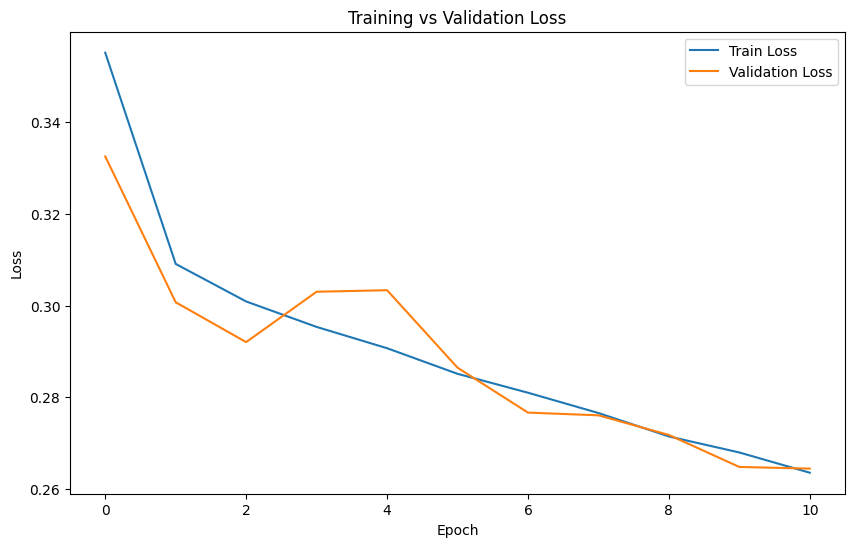

In [98]:
import matplotlib.pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


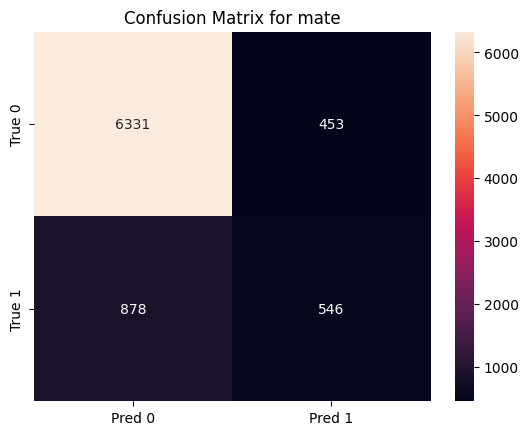

In [99]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns; import matplotlib.pyplot as plt

cm = multilabel_confusion_matrix(y_test, y_pred_binary)
for i, label in enumerate(labels):
    sns.heatmap(cm[i], annot=True, fmt="d", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
    plt.title(f'Confusion Matrix for {label}')
    plt.show()


In [ ]:
# SMALLER RESNET MODEL 
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from tensorflow.keras.optimizers import Adam

# def build_small_resnet(input_shape, num_classes):
#     """
#     Returns a small ResNet model for multi-label classification.
#     """
#     inputs = layers.Input(shape=input_shape)

#     # Initial Conv + BN + ReLU
#     x = layers.Conv2D(32, (3, 3), padding='same', use_bias=False)(inputs)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)

#     # --- Residual Block #1 ---
#     x = residual_block(x, filters=32)
#     # --- Residual Block #2 ---
#     x = residual_block(x, filters=32)
#     # (Feel free to add more if performance is lacking)

#     # Increase filter size for next set, stride=2 to halve spatial dimension
#     x = residual_block(x, filters=64, stride=2)
#     x = residual_block(x, filters=64)

#     # Global Average Pool to reduce parameters
#     x = layers.GlobalAveragePooling2D()(x)

#     # Final Dense layer with sigmoid for multi-label
#     outputs = layers.Dense(num_classes, activation='sigmoid')(x)

#     model = models.Model(inputs, outputs)
#     return model

# def residual_block(x, filters, stride=1):
#     """
#     A basic residual block with:
#      - 2 Conv layers (3x3)
#      - BatchNorm + ReLU
#      - Skip connection
#     """
#     shortcut = x

#     # First conv
#     x = layers.Conv2D(filters, (3, 3), strides=stride, padding='same', use_bias=False)(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)

#     # Second conv
#     x = layers.Conv2D(filters, (3, 3), strides=1, padding='same', use_bias=False)(x)
#     x = layers.BatchNormalization()(x)

#     # If we changed the stride (downsample) or changed filter size, adjust shortcut
#     if stride != 1 or shortcut.shape[-1] != filters:
#         shortcut = layers.Conv2D(filters, (1, 1), strides=stride, padding='same', use_bias=False)(shortcut)
#         shortcut = layers.BatchNormalization()(shortcut)

#     # Merge skip connection
#     x = layers.Add()([x, shortcut])
#     x = layers.ReLU()(x)

#     return x
